In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('spacex_raw_data.csv')

df.head()

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2010-03-13T00:00:00.000Z,1.268438e+09,False,0.0,5e9d0d95eda69973a809d1ec,True,[],NaN,[],[],...,NaN,NaN,[],[],http://forum.nasaspaceflight.com/index.php?act...,https://www.youtube.com/watch?v=nxSxgBKlYws,nxSxgBKlYws,http://www.spacex.com/news/2013/02/12/falcon-9...,https://en.wikipedia.org/wiki/Dragon_Spacecraf...,NaN
1,2010-12-04T00:00:00.000Z,1.291421e+09,False,0.0,5e9d0d95eda69973a809d1ec,True,[],NaN,[],['5ea6ed2d080df4000697c901'],...,NaN,NaN,[],[],http://www.spacex.com/files/downloads/cots1-20...,https://www.youtube.com/watch?v=cdLITgWKe_0,cdLITgWKe_0,https://en.wikipedia.org/wiki/SpaceX_COTS_Demo...,https://en.wikipedia.org/wiki/SpaceX_COTS_Demo...,NaN
2,2012-04-30T00:00:00.000Z,1.335744e+09,False,0.0,5e9d0d95eda69973a809d1ec,True,[],"Launch was scrubbed on first attempt, second l...",[],['5ea6ed2d080df4000697c901'],...,NaN,NaN,[],[],https://www.nasa.gov/pdf/649910main_cots2_pres...,https://www.youtube.com/watch?v=tpQzDbAY7yI,tpQzDbAY7yI,https://en.wikipedia.org/wiki/Dragon_C2%2B,https://en.wikipedia.org/wiki/Dragon_C2%2B,NaN
3,2012-09-29T00:00:00.000Z,1.348877e+09,False,0.0,5e9d0d95eda69973a809d1ec,True,[],"CRS-1 successful, but the secondary payload wa...",[],['5ea6ed2d080df4000697c902'],...,NaN,NaN,[],[],https://www.nasa.gov/pdf/694166main_SpaceXCRS-...,https://www.youtube.com/watch?v=-Vk3hiV_zXU,-Vk3hiV_zXU,https://www.nasa.gov/mission_pages/station/mai...,https://en.wikipedia.org/wiki/SpaceX_CRS-1,NaN
4,2013-02-25T18:30:00.000Z,1.361817e+09,False,0.0,5e9d0d95eda69973a809d1ec,True,[],Last launch of the original Falcon 9 v1.0 laun...,[],['5ea6ed2d080df4000697c902'],...,NaN,NaN,[],[],https://www.nasa.gov/sites/default/files/files...,https://www.youtube.com/watch?v=ik0ElKl5kW4,ik0ElKl5kW4,https://en.wikipedia.org/wiki/SpaceX_CRS-2,https://en.wikipedia.org/wiki/SpaceX_CRS-2,NaN


Index(['static_fire_date_utc', 'static_fire_date_unix', 'net', 'window',
       'rocket', 'success', 'failures', 'details', 'crew', 'ships', 'capsules',
       'payloads', 'launchpad', 'flight_number', 'name', 'date_utc',
       'date_unix', 'date_local', 'date_precision', 'upcoming', 'cores',
       'auto_update', 'tbd', 'launch_library_id', 'id', 'fairings.reused',
       'fairings.recovery_attempt', 'fairings.recovered', 'fairings.ships',
       'links.patch.small', 'links.patch.large', 'links.reddit.campaign',
       'links.reddit.launch', 'links.reddit.media', 'links.reddit.recovery',
       'links.flickr.small', 'links.flickr.original', 'links.presskit',
       'links.webcast', 'links.youtube_id', 'links.article', 'links.wikipedia',
       'fairings'],
      dtype='object')


In [4]:
def getBoosterVersion(data):
    for x in data['rocket']:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

def getLaunchSite(data):
    for x in data['launchpad']:
        response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
        LaunchSite.append(response['name'])
        Longitude.append(response['longitude'])
        Latitude.append(response['latitude'])

def getPayloadData(data):
    for load in data['payloads']:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

df = df[df['rocket'] != 'Falcon 1']

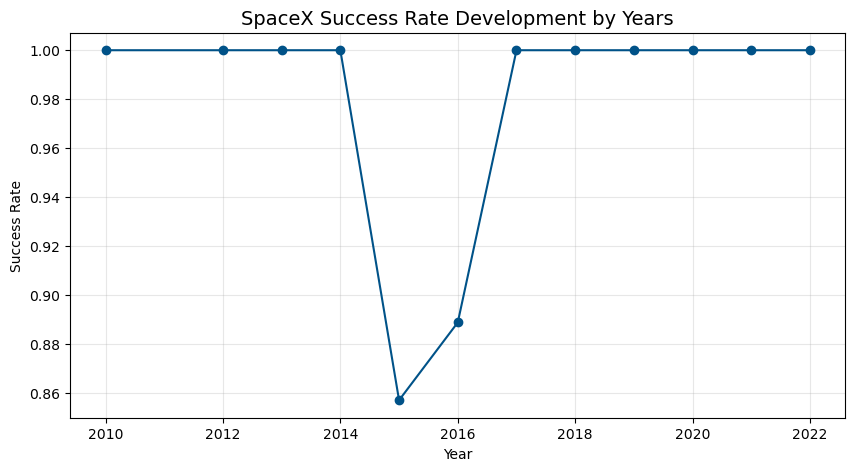

In [8]:
# Success rate chart by year
df['Year'] = pd.DatetimeIndex(df['date_utc']).year
success_rate = df.groupby('Year')['success'].mean()

plt.figure(figsize=(10,5))
success_rate.plot(kind='line', marker='o', color='#005288')
plt.title('SpaceX Success Rate Development by Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.grid(True, alpha=0.3)
plt.show()
